In [2]:
import requests
import json

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Get data

In [4]:
API_key='d15f7132973d404d9d046934398ee9e3'

In [5]:
# API authorization
headers = {'x-api-key':'d15f7132973d404d9d046934398ee9e3', 'accept': 'application/json', 'accept': 'text/csv'}

# Choose endpoint
endpoint = 'https://www.capology.com/api/v2/soccer/salaries/br/brasileiro/2020/'

# Retrieve json
json1 = requests.get(endpoint, headers=headers).text

#Data for 2020
df1 = pd.read_json(json1)

#Capology has defined the seson as winter,combined
df1 = df1[df1["season_term"] == "combined"].reset_index(drop = True)

In [6]:
# API authorization
headers = {'x-api-key':'d15f7132973d404d9d046934398ee9e3', 'accept': 'application/json', 'accept': 'text/csv'}

# Choose endpoint
endpoint = 'https://www.capology.com/api/v2/soccer/salaries/br/brasileiro/2021/'

# Retrieve json
json2 = requests.get(endpoint, headers=headers).text

#Data for 2021
df2 = pd.read_json(json2)

df2 = df2[df2["season_term"] == "summer"]

In [7]:
# API authorization
headers = {'x-api-key':'d15f7132973d404d9d046934398ee9e3', 'accept': 'application/json', 'accept': 'text/csv'}

# Choose endpoint
endpoint = 'https://www.capology.com/api/v2/soccer/salaries/br/brasileiro/2022/'

# Retrieve json
json3 = requests.get(endpoint, headers=headers).text

#Data for 2022
df3 = pd.read_json(json3)

df3 = df3[df3["season_term"] == "summer"]

In [8]:
df = pd.concat([df1,df3,df2],axis=0).drop_duplicates()


In [9]:
# CODE_DICT=pd.Series(df_salary.club_code.values,index=df_salary.club_name).to_dict()
# CODE_DICT

### Clean data frame

In [10]:
df = df[df['salary_gross_eur'] != 0]

In [11]:
#Required columns
LIST=['season_id','club_name','club_code','player_name',
      'player_age','player_country_id','player_group_code','salary_gross_eur']

In [12]:
df_salary=df[LIST].reset_index(drop = True)


In [44]:
df_salary['club_code'] = df_salary['club_code'].astype('str')

### Add needed features

In [14]:
def set_region(row):
    """
    Function takes each row as argument and returns the region 
    based on the player_country_id.
    """
    
    south_america = {'uruguay', 'colombia', 'argentina', 'ecuador','chile', 'venezuela', 'paraguay','peru','bolivia'}
    europe = {'spain','italy','belarus','portugal','finland','ukraine','finland'}
    rest_of_world = {'south-korea','united-states','china','japan','cote-d-ivoire'}
    
    if row['player_country_id'] in south_america:
        return 'south america'
    
    elif row['player_country_id'] in europe:
        return 'europe'
    
    elif row['player_country_id'] in rest_of_world:
        return 'rest of the world'
    
    else:
        return 'brazil'

In [15]:
set(df_salary.player_country_id)

{'argentina',
 'belarus',
 'bolivia',
 'brazil',
 'chile',
 'china',
 'colombia',
 'cote-d-ivoire',
 'ecuador',
 'finland',
 'italy',
 'japan',
 'paraguay',
 'peru',
 'portugal',
 'south-korea',
 'spain',
 'ukraine',
 'united-states',
 'uruguay',
 'venezuela'}

In [16]:
df_salary = df_salary.assign(region=df_salary.apply(set_region, axis=1)).astype('category')


In [17]:
set(df_salary.region)

{'brazil', 'europe', 'rest of the world', 'south america'}

In [18]:
#Normalised gross salary by club
#df_salary['normalised_gross_salary']= df_salary.groupby('club_code', group_keys=False).apply(lambda x: x['salary_gross_eur']/ x['salary_gross_eur'].sum())

In [19]:
#Normalised net salary by club
#df_salary['normalised_net_salary']= df_salary.groupby('club_code', group_keys=False).apply(lambda x: x['salary_net_eur']/ x['salary_net_eur'].sum())

In [20]:
#position normalised grossed salary
#df_salary['position_normalised_gross_salary']= df_salary.groupby('player_group_code', group_keys=False).apply(lambda x: x['salary_gross_eur']/ x['salary_gross_eur'].mean())

In [21]:
df_salary['salary_gross_eur'] = df_salary['salary_gross_eur'].astype('float')
df_salary['player_age'] = df_salary['player_age'].astype('float')

In [45]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   season_id          2202 non-null   category
 1   club_name          2202 non-null   category
 2   club_code          2202 non-null   object  
 3   player_name        2202 non-null   category
 4   player_age         2202 non-null   float64 
 5   player_country_id  2202 non-null   category
 6   player_group_code  2202 non-null   category
 7   salary_gross_eur   2202 non-null   float64 
 8   region             2202 non-null   category
dtypes: category(6), float64(2), object(1)
memory usage: 110.3+ KB


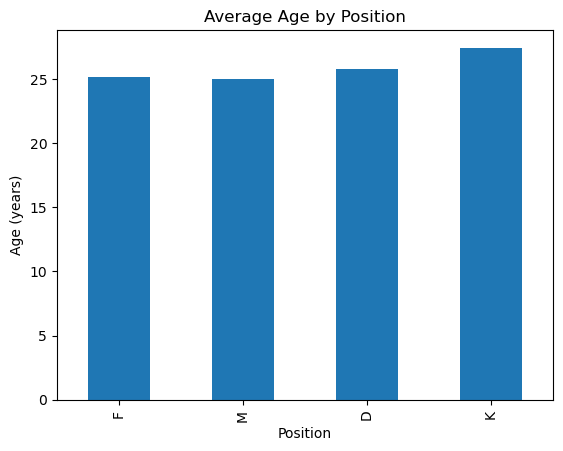

In [137]:
grouped = df_salary.groupby('player_group_code')['player_age'].mean()
grouped = grouped.reindex(['F', 'M', 'D', 'K'])

# Plot the average age by position
grouped.plot.bar()

# Add a title and labels to the plot
plt.title("Average Age by Position")
plt.xlabel("Position")
plt.ylabel("Age (years)")

# Show the plot
plt.show()

In [138]:
list(grouped)

[25.145299145299145, 24.979591836734695, 25.75207756232687, 27.431818181818183]

In [22]:
# Final league standing
DICT={'CAM': 0,
 'FLA': 1,
 'PLM': 2,
 'FOR': 3,
 'CRS': 4,
 'RED': 5,
 'FLU': 6,
 'AMG': 7,
 'GOE': 8,
 'SAN': 9,
 'CEA': 10,
 'INR': 11,
 'SAP': 12,
 'CAP': 13,
 'CUI': 14,
 'JUD': 15,
 'GRM': 16,
 'ECB': 17,
 'SCR': 18,
 'CPE': 19}


### Seperate Dataframes

In [23]:
DIFF = ['RED','CRS','BOT','CRB','GOE','SAP','SCR','GOI','CUI']

In [46]:
df_diff = df_salary[df_salary['club_code'].isin(DIFF)]

df_diff = df_diff.groupby(['club_code','player_group_code'], as_index = False).mean(numeric_only = True).dropna()

df_diff = df_diff.sort_values(by=['club_code'], key=lambda x: x.map(DICT))

In [49]:
df_sim = df_salary[~df_salary.club_code.isin(DIFF)]

df_sim = df_sim.groupby(['club_code','player_group_code'], as_index = False).mean(numeric_only = True).dropna()

df_sim = df_sim.sort_values(by=['club_code'], key=lambda x: x.map(DICT))

In [125]:
# Generate the plot
hue_order = ['F', 'M','D','K']
plot1 = sns.catplot(x = "club_code",       # x variable name
            y = "salary_gross_eur",       # y variable name
            hue = "player_group_code",  # group variable name
            hue_order = hue_order,
            data = df_diff,     # dataframe to plot
            kind = "bar",
            height=8.27, aspect=14.7/8.27,
            palette='winter'  
           )

plot1.set(xlabel='Club', ylabel='Average Wage')

plt.suptitle('Average Wage by Position', y=-0.05)

# Place the legend outside the top right corner of the plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Show the plot
#plt.show()

# Save the plot as a transparent PNG file
plt.savefig('outlier_average_wage.png', transparent=True)


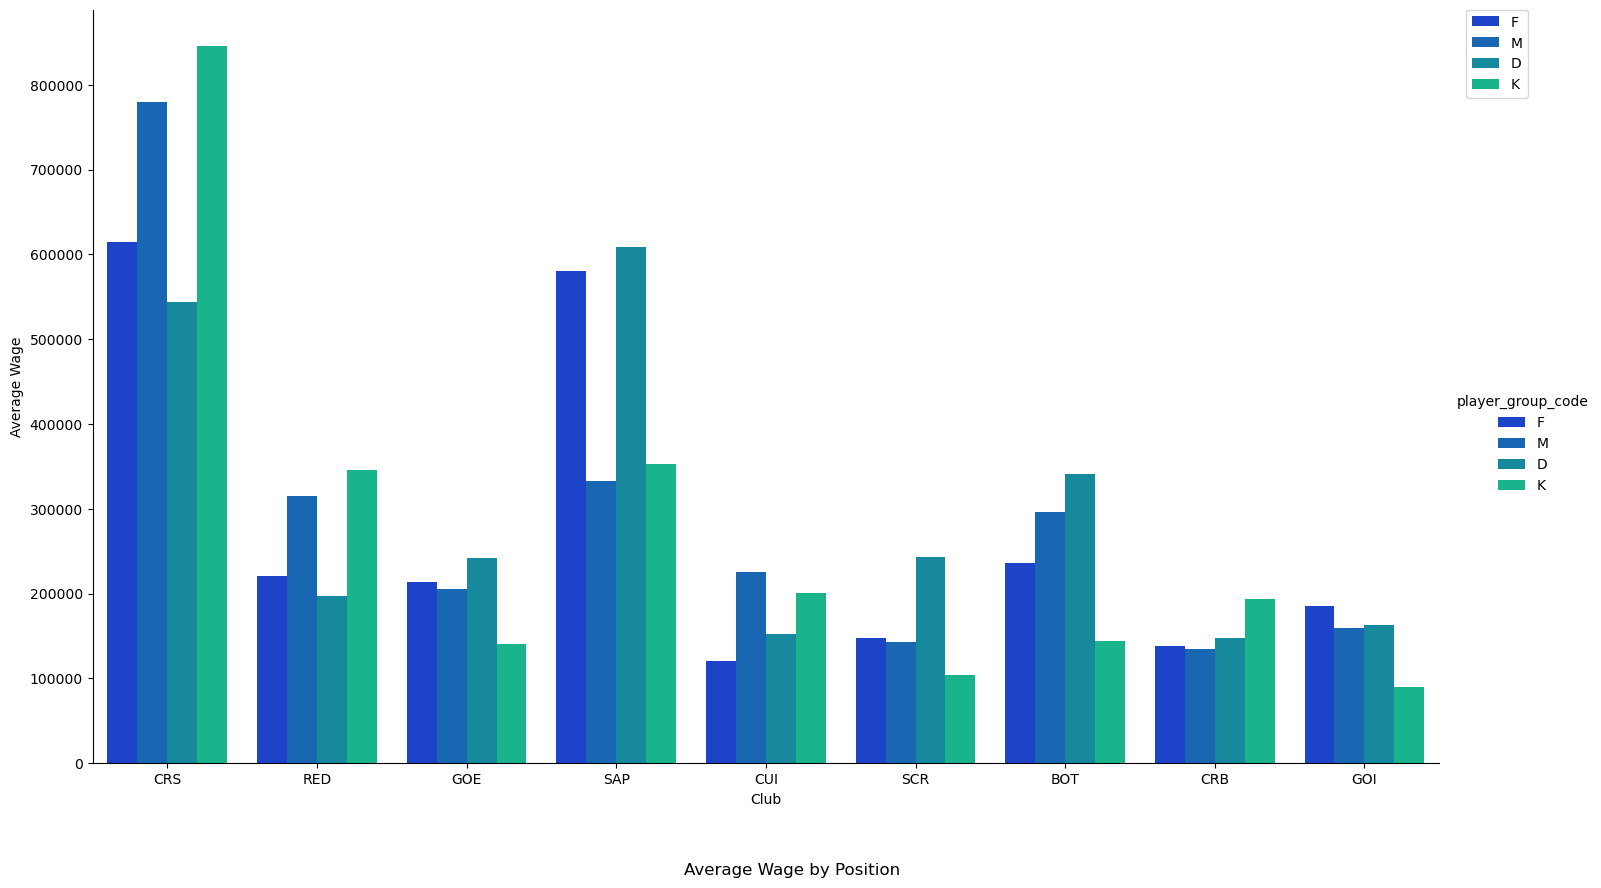

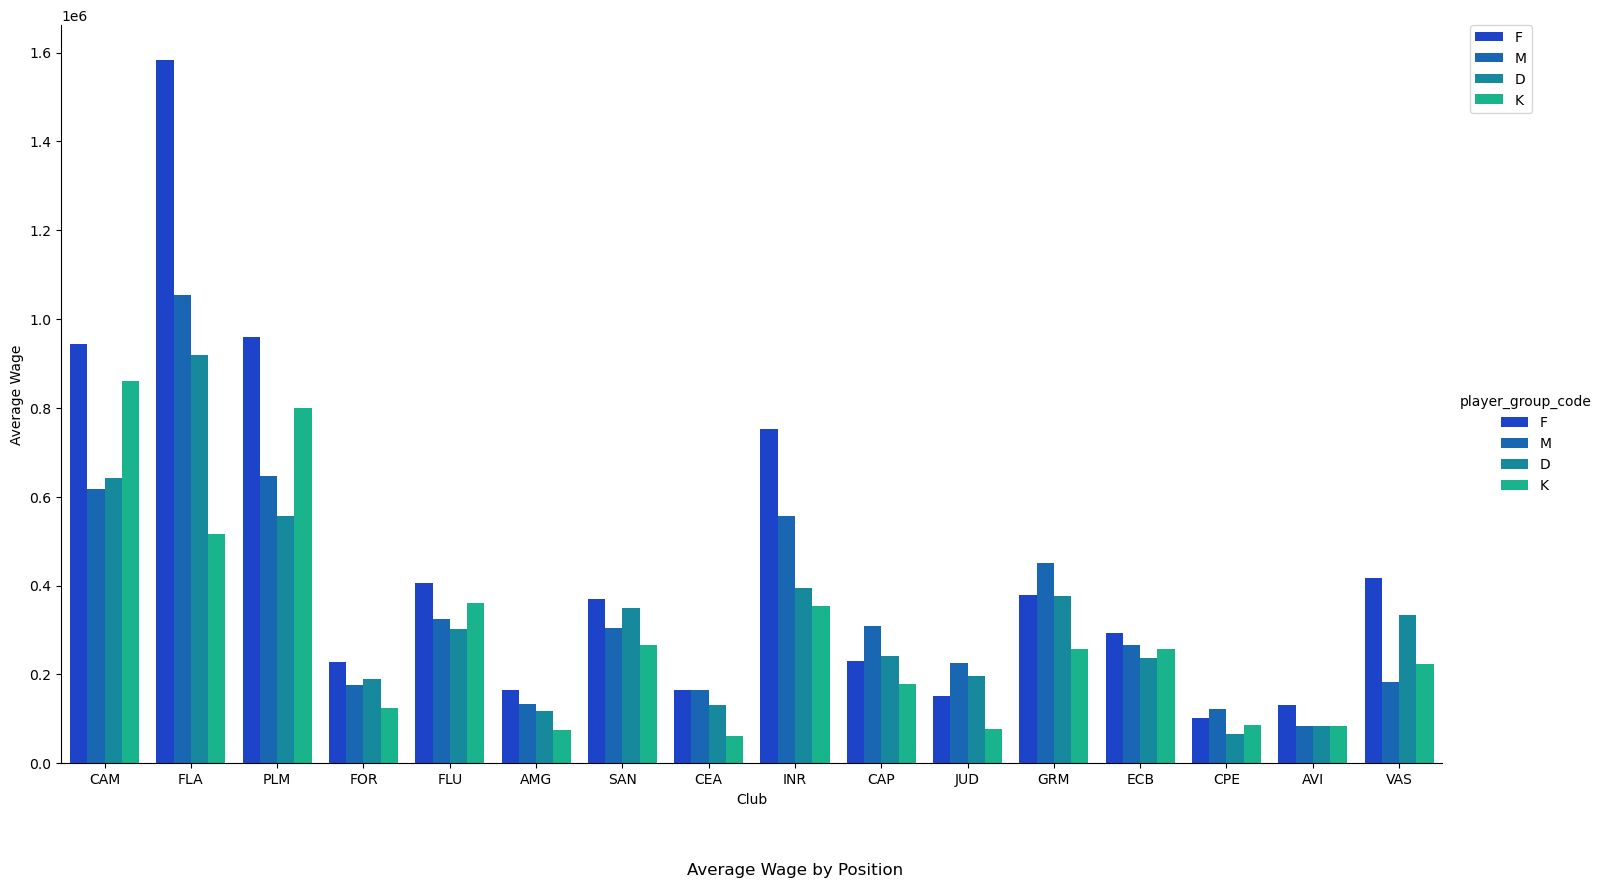

In [126]:
hue_order = ['F', 'M','D','K']
plot1 = sns.catplot(x = "club_code",       # x variable name
            y = "salary_gross_eur",       # y variable name
            hue = "player_group_code",  # group variable name
            hue_order = hue_order,
            data = df_sim,     # dataframe to plot
            kind = "bar",
            height=8.27, aspect=14.7/8.27,
            palette='winter'  
           )

plot1.set(xlabel='Club', ylabel='Average Wage')
plt.suptitle('Average Wage by Position', y=-0.05)

# Place the legend outside the top right corner of the plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


# Save the plot as a transparent PNG file
plt.savefig('rest_average_wage.png', transparent=True)

plt.show()

In [29]:
# plot2 = sns.catplot(x = "club_code",       # x variable name
#             y = "position_normalised_gross_salary",       # y variable name
#             hue = "player_group_code",  # group variable name
#             data = df_by_team,     # dataframe to plot
#             kind = "bar",
#             height=8.27, aspect=14.7/8.27,
#             palette='winter'     
#            )

# plot2.set(xlabel='Club', ylabel='Wage of player as a propotion of the mean wage for the postion')
# plt.show()

In [30]:
# plot2 = sns.catplot(x = "club_code",       # x variable name
#             y = "position_normalised_gross_salary",       # y variable name
#             hue = "player_group_code",  # group variable name
#             data = df_sim,     # dataframe to plot
#             kind = "bar",
#             height=8.27, aspect=14.7/8.27,
#             palette='winter'     
#            )

# plot2.set(xlabel='Club', ylabel='Wage of player as a propotion of the mean wage for the postion')
# plt.show()

In [31]:
# Load the data
df1 = df_salary[~df_salary.club_code.isin(DIFF)]

count_b=[]
count_s=[]
count_e=[]
count_r=[]
for club in set(df1.club_code):
    count_b.append(len(df1[(df1['club_code'] == club) & (df1['region'] == 'brazil')]))
    count_s.append(len(df1[(df1['club_code'] == club) & (df1['region'] == 'south america')]))
    count_e.append(len(df1[(df1['club_code'] == club) & (df1['region'] == 'europe')]))
    count_r.append(len(df1[(df1['club_code'] == club) & (df1['region'] == 'rest of the world')]))



In [32]:
percent_b = []
percent_s = []
percent_e = []
percent_r = []

for i in range(len(count_b)):
    percent_b.append(count_b[i]/(count_b[i]+count_s[i]+count_r[i]+count_e[i]))
    percent_s.append(count_s[i]/(count_b[i]+count_s[i]+count_r[i]+count_e[i]))   
    percent_e.append(count_e[i]/(count_b[i]+count_s[i]+count_r[i]+count_e[i]))   
    percent_r.append(count_r[i]/(count_b[i]+count_s[i]+count_r[i]+count_e[i]))   

In [58]:
percent_b[-4]

1.0

In [59]:
list(set(df1.club_code))[-4]

'CPE'

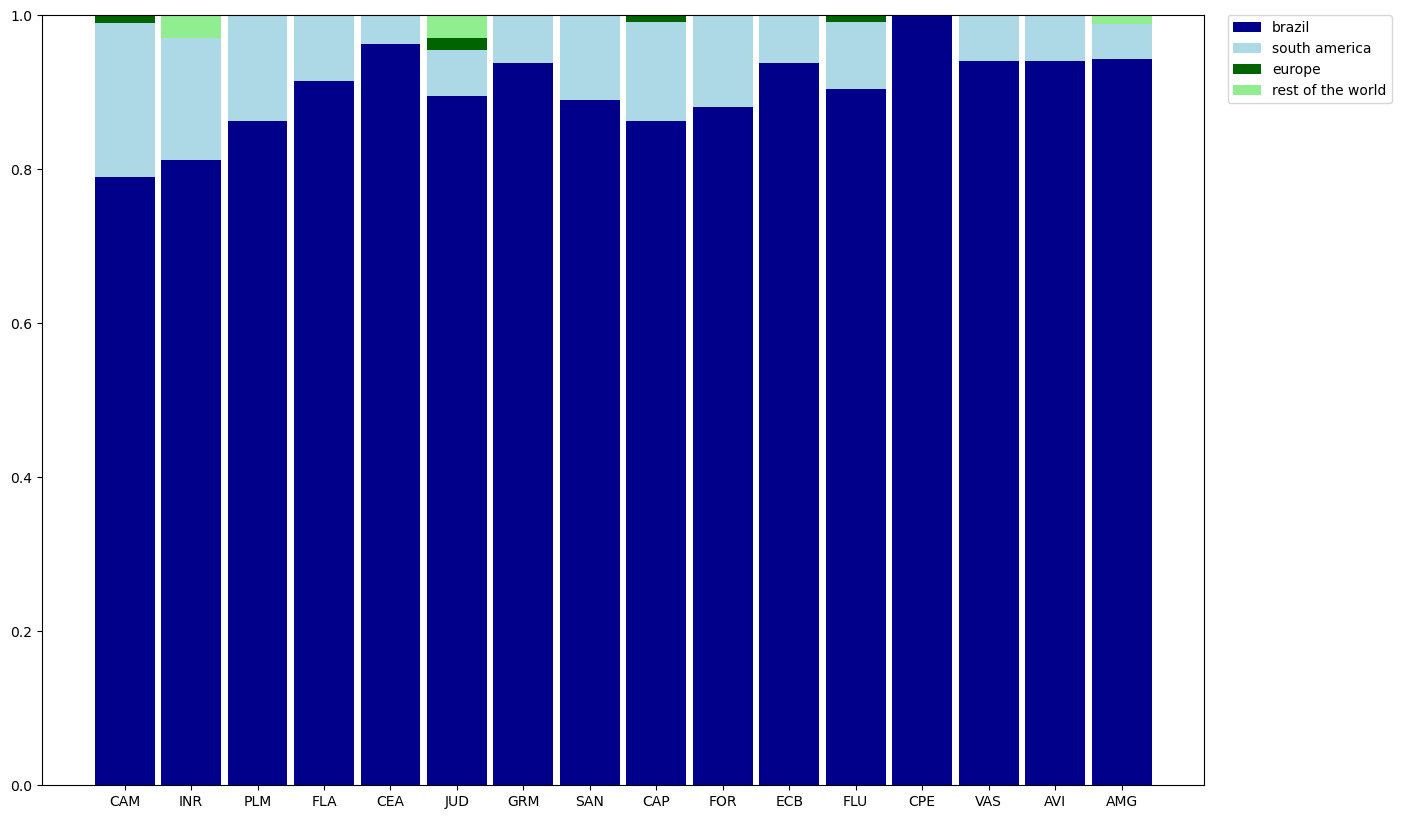

In [51]:
# set the figure size
plt.figure(figsize=(15, 10))

# Set the x-axis labels
x_labels = list(set(df1.club_code))

# Set the bar width
bar_width = 0.9

# Plot the first set of bars
plt.bar(x_labels,percent_b, width=bar_width, color='darkblue', label='brazil')

# Plot the second set of bars, stacked on top of the first set
plt.bar(x_labels, percent_s, width=bar_width, bottom=percent_b, color='lightblue', label='south america')

# Plot the third set of bars, stacked on top of the second set
plt.bar(x_labels, percent_e, width=bar_width, bottom=[percent_b[i]+percent_s[i] for i in range(len(percent_b))], 
        color='darkgreen', label='europe')

# Plot the fourth set of bars, stacked on top of the third set
plt.bar(x_labels, percent_r, width=bar_width, bottom=[percent_b[i]+percent_s[i]+percent_e[i] for i in range(len(percent_b))],
        color='lightgreen', label='rest of the world')

# Add a legend
plt.legend()

# Place the legend outside the top right corner of the plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Show the plot
plt.show()

# plt.savefig('regression_plot.png', transparent=True)

In [36]:
# plot3=sns.catplot(x = "club_code",       # x variable name
#             y = "player_age",       # y variable name
#             hue = "player_group_code",  # group variable name
#             data = df_sim,     # dataframe to plot
#             kind = "bar",
#             height=8.27, aspect=14.7/8.27,
#             palette='winter'
#            )

# plot3.set(xlabel='Club', ylabel='Average player age by position')
# plot3.set(ylim=(15, 35))
          
# plt.show()

In [117]:
# Load the data
df2 = df_salary[~df_salary.club_code.isin(DIFF)]
df2 = df2.assign(Age=pd.cut(df2['player_age'], 
                               bins=[0, 17, 21,23, 27, 32,99], 
                               labels=['U18', '18-21', '21-23','23-27','27-32','32+']))

count_18=[]
count_21=[]
count_23=[]
count_27=[]
count_32=[]
count_O32=[]
for club in set(df2.club_code):
    count_18.append(len(df2[(df2['club_code'] == club) & (df2['Age'] == 'U18')]))
    count_21.append(len(df2[(df2['club_code'] == club) & (df2['Age'] == '18-21')]))
    count_23.append(len(df2[(df2['club_code'] == club) & (df2['Age'] == '21-23')]))
    count_27.append(len(df2[(df2['club_code'] == club) & (df2['Age'] == '23-27')]))
    count_32.append(len(df2[(df2['club_code'] == club) & (df2['Age'] == '27-32')]))
    count_O32.append(len(df2[(df2['club_code'] == club) & (df2['Age'] == '32+')]))





In [118]:
percent_18 = []
percent_21 = []
percent_23 = []
percent_27 = []
percent_32 = []
percent_O32 = []

for i in range(len(count_18)):
    percent_18.append(count_18[i]/(count_18[i]+count_21[i]+count_23[i]+count_27[i]+count_32[i]+count_O32[i]))
    percent_21.append(count_21[i]/(count_18[i]+count_21[i]+count_23[i]+count_27[i]+count_32[i]+count_O32[i]))  
    percent_23.append(count_23[i]/(count_18[i]+count_21[i]+count_23[i]+count_27[i]+count_32[i]+count_O32[i]))
    percent_27.append(count_27[i]/(count_18[i]+count_21[i]+count_23[i]+count_27[i]+count_32[i]+count_O32[i]))
    percent_32.append(count_32[i]/(count_18[i]+count_21[i]+count_23[i]+count_27[i]+count_32[i]+count_O32[i]))
    percent_O32.append(count_O32[i]/(count_18[i]+count_21[i]+count_23[i]+count_27[i]+count_32[i]+count_O32[i]))

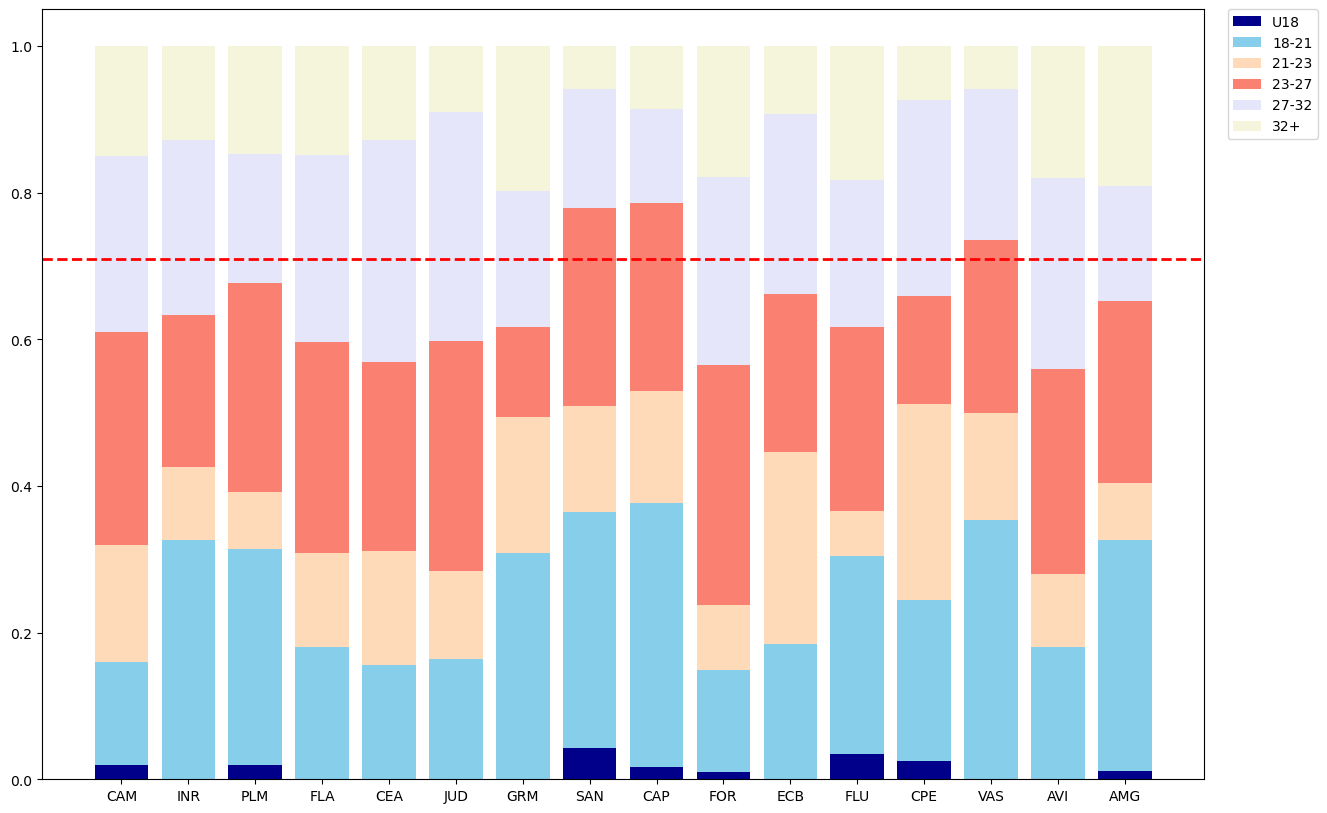

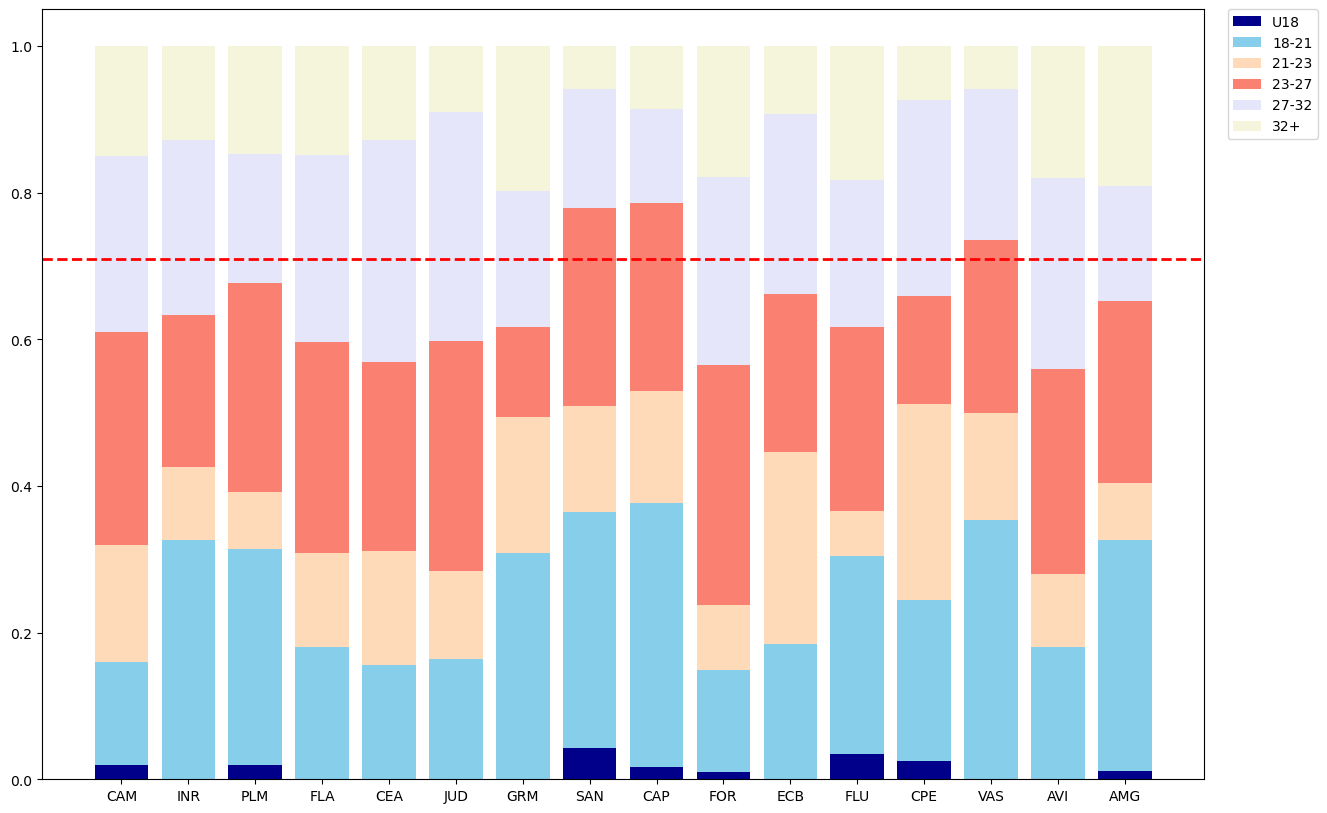

In [128]:
# set the figure size
plt.figure(figsize=(15, 10))

# Set the x-axis labels
x_labels = list(set(df2.club_code))

# Set the bar width
bar_width = 0.8

# Plot the first set of bars
plt.bar(x_labels,percent_18, width=bar_width, color='darkblue', label='U18')

# Plot the second set of bars, stacked on top of the first set
plt.bar(x_labels, percent_21, width=bar_width, bottom=percent_18, color='#87CEEB', label='18-21')

# Plot the third set of bars, stacked on top of the second set
plt.bar(x_labels, percent_23, width=bar_width, bottom=[percent_18[i]+percent_21[i] for i in range(len(percent_18))], 
        color='#FFDAB9', label='21-23')

# Plot the fourth set of bars, stacked on top of the third set
plt.bar(x_labels, percent_27, width=bar_width, bottom=[percent_18[i]+percent_21[i]+percent_23[i] for i in range(len(percent_18))],
        color='#FA8072', label='23-27')

# Plot the fourth set of bars, stacked on top of the third set
plt.bar(x_labels, percent_32, width=bar_width, bottom=[percent_18[i]+percent_21[i]+percent_23[i]+percent_27[i] for i in range(len(percent_18))],
        color='#E6E6FA', label='27-32')

# Plot the fourth set of bars, stacked on top of the third set
plt.bar(x_labels, percent_O32, width=bar_width, bottom=[percent_18[i]+percent_21[i]+percent_23[i]+percent_27[i]+percent_32[i] for i in range(len(percent_18))],
        color='#F5F5DC', label='32+')

# Place the legend outside the top right corner of the plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.axhline(y=0.71, color='red', linestyle='--', linewidth=2)

# Show the plot
plt.show()


#plt.savefig('rest_age.png', transparent=True)

In [40]:
df_salary.player_country_id.unique()

['brazil', 'colombia', 'uruguay', 'argentina', 'ecuador', ..., 'china', 'ukraine', 'finland', 'portugal', 'belarus']
Length: 21
Categories (21, object): ['argentina', 'belarus', 'bolivia', 'brazil', ..., 'ukraine', 'united-states', 'uruguay', 'venezuela']

KeyError: 'Column not found: Age'

In [132]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   season_id          2202 non-null   category
 1   club_name          2202 non-null   category
 2   club_code          2202 non-null   object  
 3   player_name        2202 non-null   category
 4   player_age         2202 non-null   float64 
 5   player_country_id  2202 non-null   category
 6   player_group_code  2202 non-null   category
 7   salary_gross_eur   2202 non-null   float64 
 8   region             2202 non-null   category
dtypes: category(6), float64(2), object(1)
memory usage: 110.3+ KB
